In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def prepare_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def plot_data(X_train, Y_train):
    plt.figure(figsize=(15,15))
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[Y_train[i]])
    plt.show()

def plot_images_result(X_test, y, predicted_classes):
    plt.figure(figsize=(15,15))
    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        plt.xlabel("True:{}  Pred:{}".format(class_names[y[i]],class_names[predicted_classes[i]]))
    plt.show()
    
def get_data():
    (X_train, Y_train), (X_test, y) = fashion_mnist.load_data()
    
    print("Shape of Training Image Data: " + str(X_train.shape))
    print("Shape of Training Class Data: " + str(Y_train.shape))
    print("Shape of Test Image Data: " + str(X_test.shape))
    print("Shape of Test Class Data: " + str(y.shape))

    plot_data(X_train, Y_train)
    
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(y)
    
    X_train, X_test = prepare_pixels(X_train, X_test)

    return X_train, Y_train, X_test, Y_test, y

# rotation + shift
def image_augumentation(X_train, Y_train):
    data_augmentor = ImageDataGenerator(rotation_range=50, 
                                        width_shift_range=0.01, 
                                        height_shift_range=0.01)

#     data_augmentor.fit(X_train)
    
    train_generator = data_augmentor.flow(X_train, Y_train, 
                                         batch_size=256,
                                         seed=123)
    
    steps_per_epoch = len(X_train) // 256
    
    return train_generator, steps_per_epoch

In [15]:
def get_model():
    model = Sequential()

    model.add(
        Conv2D(
            filters=64, 
            kernel_size=(2, 2),
            padding='same',
            activation='relu',
            input_shape=(28, 28, 1)
        )
    )

    model.add(
        MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)
        )
    )

    model.add(
        Conv2D(
            filters=32, 
            kernel_size=(2, 2),
            padding='same',
            activation='relu',
            input_shape=(28, 28, 1)
        )
    )

    model.add(
        MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)
        )
    )

    model.add(Flatten())

    model.add(
        Dense(
            units=256,
            activation='relu'
        )
    )

    model.add(
        Dense(
            units=10,
            activation='softmax'
        )
    )

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()
    
    return model

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


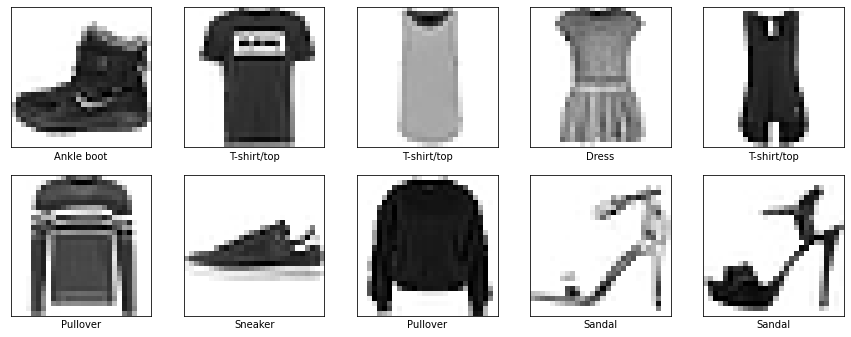

In [26]:
X_train, Y_train, X_test, Y_test, y = get_data()

In [19]:
model1 = get_model()

history = model1.fit(X_train, Y_train, batch_size=256, epochs=10, validation_split=0.2, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [27]:
predicted_classes1 = model1.predict_classes(X_test)
print(classification_report(y, predicted_classes1, target_names=class_names))

D:\Users\Aleksandra\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.81      0.92      0.86      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.88      0.81      0.84      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.80      0.90      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.76      0.69      0.72      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [29]:
correct = np.nonzero(predicted_classes1==y)[0]
incorrect = np.nonzero(predicted_classes1!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9017
Incorrect predicted classes: 983


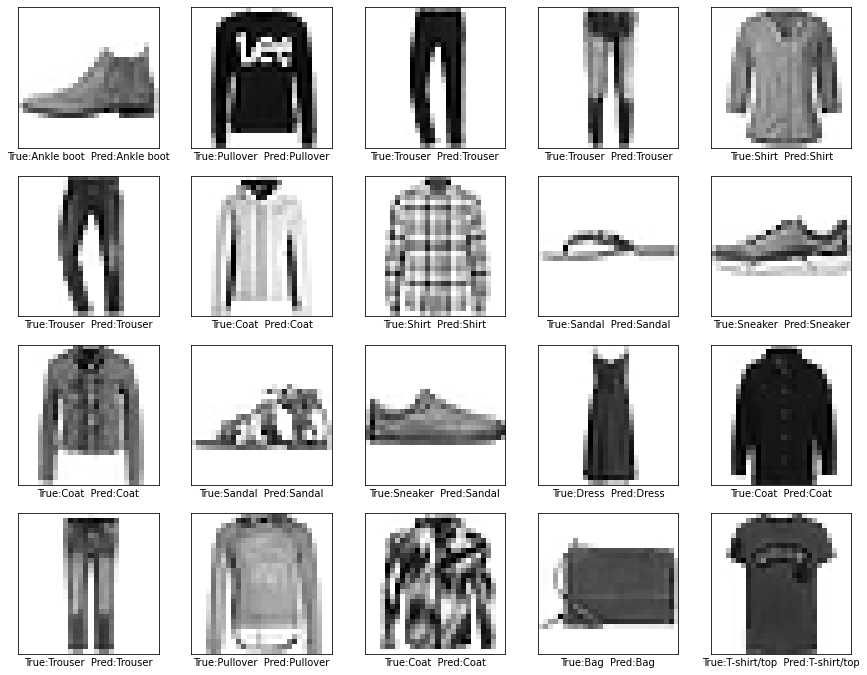

In [52]:
plot_images_result(X_test, y, predicted_classes1)

In [45]:
train_generator, steps_per_epoch = image_augumentation(X_train, Y_train)

model2 = get_model()

history = model2.fit_generator(train_generator, validation_data = (X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs = 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

D:\Users\Aleksandra\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 63s 267ms/step - loss: 1.1473 - accuracy: 0.5845 - val_loss: 0.6098 - val_accuracy: 0.7775
Epoch 2/10
234/234 [==============================] - 63s 269ms/step - loss: 0.5884 - accuracy: 0.7841 - val_loss: 0.6012 - val_accuracy: 0.7787
Epoch 3/10
234/234 [==============================] - 62s 265ms/step - loss: 0.5116 - accuracy: 0.8131 - val_loss: 0.5064 - val_accuracy: 0.8203
Epoch 4/10
234/234 [==============================] - 62s 263ms/step - loss: 0.4591 - accuracy: 0.8334 - val_loss: 0.4931 - val_accuracy: 0.8279
Epoch 5/10
234/234 [==============================] - 64s 273ms/step - loss: 0.4373 - accuracy: 0.8392 - val_loss: 0.4152 - val_accuracy: 0.8577
Epoch 6/10
234/234 [==============================] - 64s 272ms/step - loss: 0.4069 - accuracy: 0.8524 - val_loss: 0.4196 - val_accuracy: 0.8530
Epoch 7/10
234/234 [==============================] - 61s 262ms/step - loss: 0.3873 - accuracy: 0.8599 - val_loss: 0.3954 - val_ac

In [46]:
predicted_classes2 = model2.predict_classes(X_test)
print(classification_report(y, predicted_classes2, target_names=class_names))

D:\Users\Aleksandra\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.83      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.89      0.84      0.86      1000
        Coat       0.76      0.83      0.79      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.69      0.66      0.67      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [48]:
correct = np.nonzero(predicted_classes2==y)[0]
incorrect = np.nonzero(predicted_classes2!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8773
Incorrect predicted classes: 1227


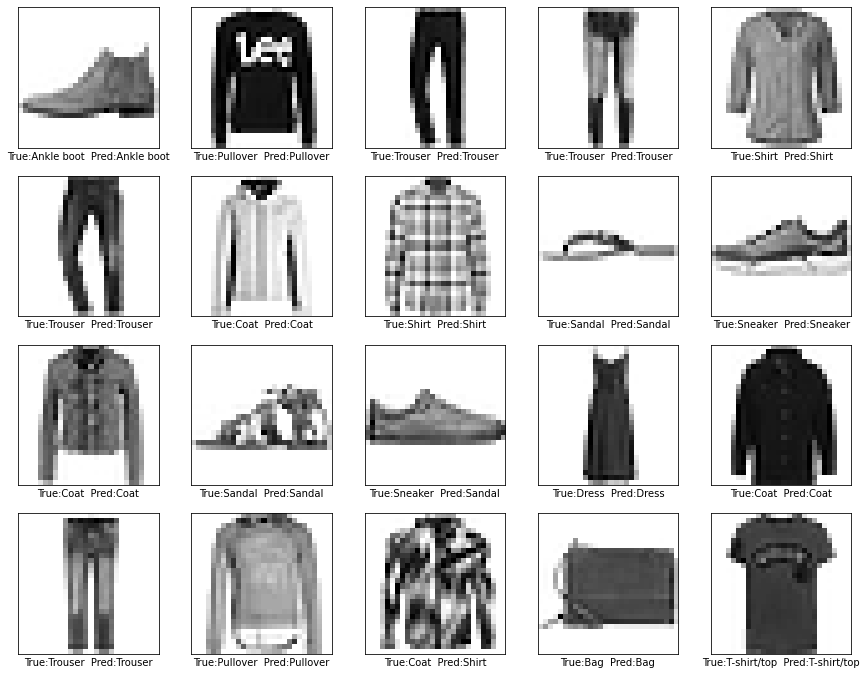

In [53]:
plot_images_result(X_test, y, predicted_classes2)

In [96]:
def pooling(A_prev, f, stride, mode = "max"):
    
    H_prev, W_prev, C_prev = A_prev.shape
      
    H = int(1 + (H_prev - f) / stride)
    W = int(1 + (W_prev - f) / stride)
    C = C_prev
    
    A = np.zeros((H, W, C))              
    
    for h in range(H):
        for w in range(W):
            for c in range(C):

                y_start = h * stride
                y_end   = y_start + f
                x_start = w * stride
                x_end   = x_start + f

                a_slice = A_prev[y_start:y_end, x_start:x_end, c]

                if mode == "max":
                    A[h, w, c] = np.max(a_slice)
                elif mode == "average":
                    A[h, w, c] = np.mean(a_slice)
    
    return A

In [97]:
np.random.seed(1)
A_prev = np.random.randn(4, 4, 3)

A = pooling(A_prev, stride=2, f=3)
print("mode = max")
print("A_prev shape =", A_prev.shape)
print("A shape =", A.shape)
print()
A = pooling(A_prev, stride=2, f=3, mode="average")
print("mode = average")
print("A_prev shape =", A_prev.shape)
print("A shape =", A.shape)

mode = max
A_prev shape = (4, 4, 3)
A shape = (1, 1, 3)

mode = average
A_prev shape = (4, 4, 3)
A shape = (1, 1, 3)


In [98]:
x = np.array(X_test[0])

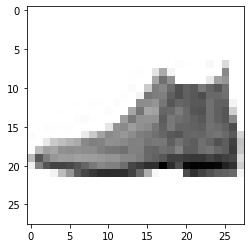

In [99]:
plt.imshow(x, cmap=plt.cm.binary)
plt.show()

In [100]:
x1 = pooling(x, 2, 3)

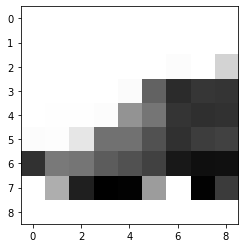

In [101]:
plt.imshow(x1, cmap=plt.cm.binary)
plt.show()

In [102]:
x2 = pooling(x, 2, 3, 'average')

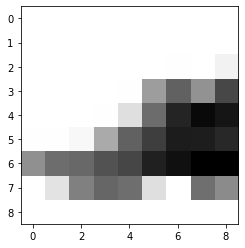

In [103]:
plt.imshow(x2, cmap=plt.cm.binary)
plt.show()